<a href="https://colab.research.google.com/github/AkiraMarques/MNIST-KERAS/blob/main/Tarefa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarefa 3**

Use o Keras para classificar números da base de dados MNIST.


*   The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems and in the field of machine learning.

The MNIST database contains 60.000 training images and 10.000 testing images



Explore diversos tipos de redes, arquiteturas, camadas, funções, ...


*   Mude tamanho, número de camadas
*   Mude a função de ativação
*   Mude o cálculo de erro
*   Mude o algoritmo de aprendizado



In [2]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[7 2 1 ... 4 5 6]


In [3]:
import tensorflow.keras as keras

y_train_onehot = keras.utils.to_categorical(y_train, num_classes = 10)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes = 10)

# imprime os 5 primeiros valores para exemplificar a codificacao
print("### Antes ###")
print(y_train[:5])
print(y_test[:5])

print("\n### Depois ###")
print(y_train_onehot[:5])
print(y_test_onehot[:5])


### Antes ###
[5 0 4 1 9]
[7 2 1 0 4]

### Depois ###
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## 1º Estudo

4 camadas:

Flatten(input_shape=(28,28))

Dense(128, activation='sigmoid')

Dense(64, activation='sigmoid')

Dense(10, activation='sigmoid')

optimizer = 'adam'

loss = 'categorical_crossentropy'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='sigmoid', input_dim=784))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.compile('adam','categorical_crossentropy', metrics=['categorical_accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


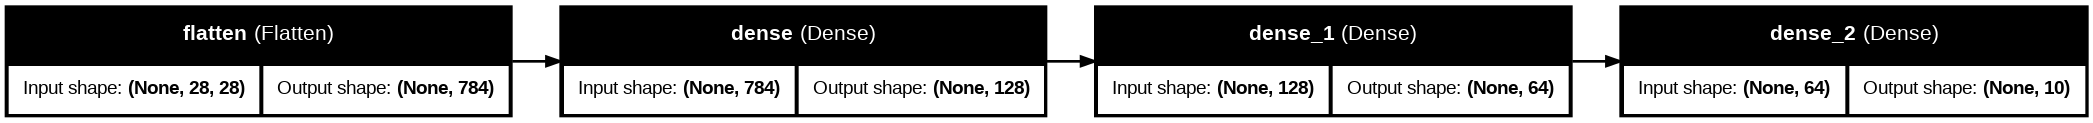

In [ ]:
#model=create_model()
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train_onehot, validation_split=.1, epochs=500, verbose=2)

Epoch 1/500
1688/1688 - 9s - 6ms/step - categorical_accuracy: 0.8399 - loss: 0.6219 - val_categorical_accuracy: 0.9113 - val_loss: 0.3225
Epoch 2/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.8918 - loss: 0.3651 - val_categorical_accuracy: 0.9153 - val_loss: 0.2782
Epoch 3/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.8971 - loss: 0.3382 - val_categorical_accuracy: 0.9215 - val_loss: 0.2593
Epoch 4/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9069 - loss: 0.3094 - val_categorical_accuracy: 0.9188 - val_loss: 0.2612
Epoch 5/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9075 - loss: 0.3024 - val_categorical_accuracy: 0.9318 - val_loss: 0.2384
Epoch 6/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9090 - loss: 0.2930 - val_categorical_accuracy: 0.9317 - val_loss: 0.2348
Epoch 7/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9178 - loss: 0.2667 - val_categorical_accuracy: 0.9352 - val_loss: 0.2087
Epoch 8/500
1688/1688 - 2s - 1ms/s

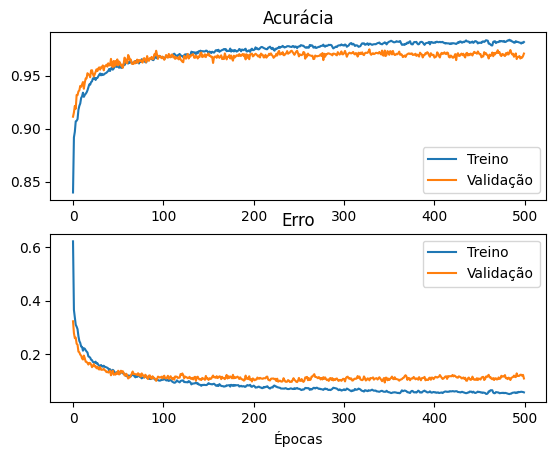

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1)

#  "Accuracy"
axes[0].plot(history.history['categorical_accuracy'])
axes[0].set_title('Acurácia')
# "Loss"
axes[1].plot(history.history['loss'])
axes[1].set_title('Erro')

if 'val_loss' in history.history.keys():
  axes[0].plot(history.history['val_categorical_accuracy'])
  axes[1].plot(history.history['val_loss'])
  axes[0].legend(['Treino', 'Validação'])
  axes[1].legend(['Treino', 'Validação'])

plt.xlabel('Épocas')
plt.show()

In [ ]:
#Calculando classes preditas para os valores de teste

y_pred = model.predict(X_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.35327895e-07 1.13081075e-02 9.69039975e-04 ... 9.99249041e-01
  2.14912725e-04 6.54730424e-02]
 [1.58287219e-06 6.09789081e-02 9.97832358e-01 ... 3.82629165e-04
  7.59517497e-05 1.14220922e-09]
 [4.75097175e-12 9.99329269e-01 4.46441903e-04 ... 1.26284052e-04
  7.70409024e-05 7.31311502e-07]
 ...
 [2.82051747e-06 5.02416398e-03 6.71665694e-05 ... 1.66546062e-01
  4.60263138e-04 8.76632577e-04]
 [2.31303403e-07 8.05216516e-08 4.86790805e-06 ... 5.34605476e-07
  1.51565865e-01 3.25618174e-07]
 [1.55938705e-02 3.40175527e-10 6.27646269e-03 ... 1.40539491e-08
  2.00653239e-03 1.42523326e-08]]


In [ ]:
# Comparando os valores preditos com os reais
y_pred_onehot = y_pred.argmax(axis=1)
print('Classes reais:\t\t', y_test)
print('Classes preditas:\t', y_pred_onehot)

Classes reais:		 [7 2 1 ... 4 5 6]
Classes preditas:	 [7 2 1 ... 4 5 6]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_onehot))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_onehot)
print(cm)

[[ 968    1    0    2    1    2    3    0    2    1]
 [   0 1118    3    2    0    1    4    2    4    1]
 [   7    4  988   10    3    1    2   10    7    0]
 [   1    0    6  976    0    9    0   10    5    3]
 [   1    0    1    1  952    0    8    3    2   14]
 [   4    0    1   14    2  856    4    3    5    3]
 [   5    2    2    1    2    3  936    0    7    0]
 [   2    6    9    6    2    1    0  988    2   12]
 [   5    0    4    6    3    9    2    8  935    2]
 [   1    2    1    8   23    4    1   10    6  953]]


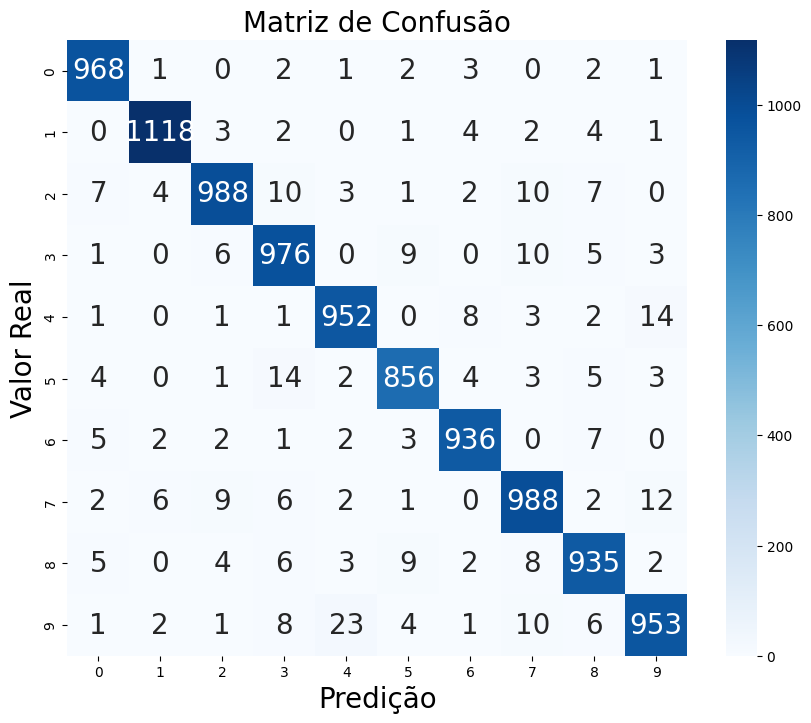

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 20})  # Aumenta o tamanho da fonte das anotações
plt.xlabel('Predição', fontsize=20)
plt.ylabel('Valor Real', fontsize=20)
plt.title('Matriz de Confusão', fontsize=20)
plt.show()

## 2º Estudo

4 camadas:

Flatten(input_shape=(28,28))

Dense(128, activation='relu')

Dense(64, activation='sigmoid')

Dense(10, activation='sigmoid')

optimizer = 'adam'

loss = 'categorical_crossentropy'

In [ ]:
model2 = Sequential()
model2.add(keras.layers.Flatten(input_shape=(28,28)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64,activation='sigmoid'))
model2.add(Dense(10,activation='sigmoid'))
model2.compile('adam','categorical_crossentropy', metrics=['categorical_accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


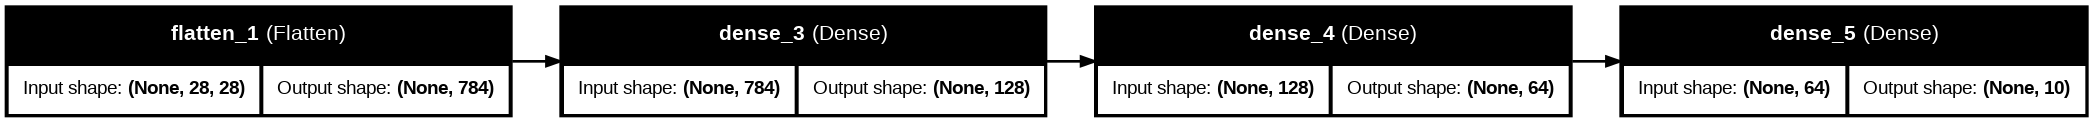

In [ ]:
#model2=create_model2()
from tensorflow.keras.utils import plot_model

plot_model(
    model2,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96
)

In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model2.fit(X_train, y_train_onehot, validation_split=.1, epochs=500, verbose=2)

Epoch 1/500
1688/1688 - 8s - 4ms/step - categorical_accuracy: 0.8166 - loss: 0.6541 - val_categorical_accuracy: 0.9112 - val_loss: 0.2950
Epoch 2/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9012 - loss: 0.3337 - val_categorical_accuracy: 0.9310 - val_loss: 0.2401
Epoch 3/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9149 - loss: 0.2860 - val_categorical_accuracy: 0.9298 - val_loss: 0.2430
Epoch 4/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9168 - loss: 0.2753 - val_categorical_accuracy: 0.9240 - val_loss: 0.2406
Epoch 5/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9223 - loss: 0.2613 - val_categorical_accuracy: 0.9340 - val_loss: 0.2182
Epoch 6/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9202 - loss: 0.2649 - val_categorical_accuracy: 0.9400 - val_loss: 0.2058
Epoch 7/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9219 - loss: 0.2634 - val_categorical_accuracy: 0.9408 - val_loss: 0.2046
Epoch 8/500
1688/1688 - 2s - 1ms/s

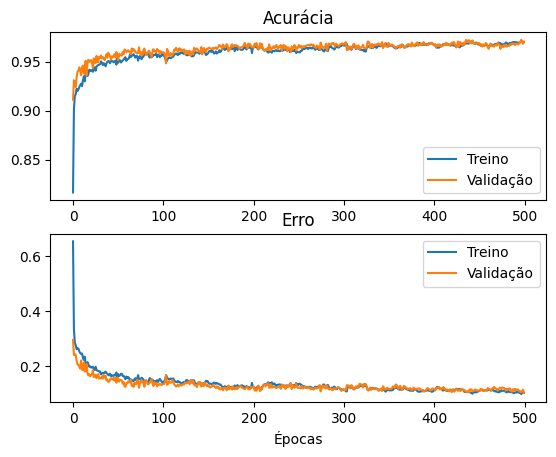

In [ ]:
fig, axes = plt.subplots(2,1)

#  "Accuracy"
axes[0].plot(history.history['categorical_accuracy'])
axes[0].set_title('Acurácia')
# "Loss"
axes[1].plot(history.history['loss'])
axes[1].set_title('Erro')

if 'val_loss' in history.history.keys():
  axes[0].plot(history.history['val_categorical_accuracy'])
  axes[1].plot(history.history['val_loss'])
  axes[0].legend(['Treino', 'Validação'])
  axes[1].legend(['Treino', 'Validação'])

plt.xlabel('Épocas')
plt.show()

In [ ]:
#Calculando classes preditas para os valores de teste

y_pred = model2.predict(X_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.4890883e-09 6.6192815e-06 2.7219026e-05 ... 8.0579426e-03
  4.5230447e-08 1.5986983e-06]
 [1.5335651e-04 9.3180250e-04 8.1202671e-02 ... 6.6444147e-05
  1.2993712e-04 5.0332972e-07]
 [3.9882900e-07 1.8442146e-01 1.6507334e-05 ... 8.7590910e-05
  1.2635303e-05 8.2310698e-06]
 ...
 [8.2755207e-08 7.3504606e-07 8.8788863e-07 ... 8.1196977e-06
  2.7948020e-06 5.9521981e-06]
 [2.0151062e-06 2.9980068e-08 7.1725642e-10 ... 4.9698161e-07
  1.3786113e-04 3.3646556e-05]
 [3.4457094e-03 7.0448950e-06 4.8590396e-04 ... 1.8671187e-04
  6.0780073e-04 3.6527545e-06]]


In [ ]:
# Comparando os valores preditos com os reais
y_pred_onehot = y_pred.argmax(axis=1)
print('Classes reais:\t\t', y_test)
print('Classes preditas:\t', y_pred_onehot)

Classes reais:		 [7 2 1 ... 4 5 6]
Classes preditas:	 [7 2 1 ... 4 5 6]


In [ ]:
print(classification_report(y_test, y_pred_onehot))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.96      0.95      0.96      1010
           4       0.95      0.98      0.96       982
           5       0.96      0.97      0.96       892
           6       0.98      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



In [ ]:
cm = confusion_matrix(y_test, y_pred_onehot)
print(cm)

[[ 966    1    2    0    2    3    4    1    1    0]
 [   0 1121    4    0    0    1    1    0    8    0]
 [   4    2  992    6    5    1    2    6   14    0]
 [   0    0   14  962    1   10    0   10   11    2]
 [   1    0    6    0  959    0    3    4    1    8]
 [   3    0    0   10    2  863    8    2    3    1]
 [   5    3    3    1    5   11  926    0    4    0]
 [   1    3   14    5    4    1    0  988    1   11]
 [   7    1    7    7    4    6    4    2  930    6]
 [   5    4    0    9   28    6    0   10    4  943]]


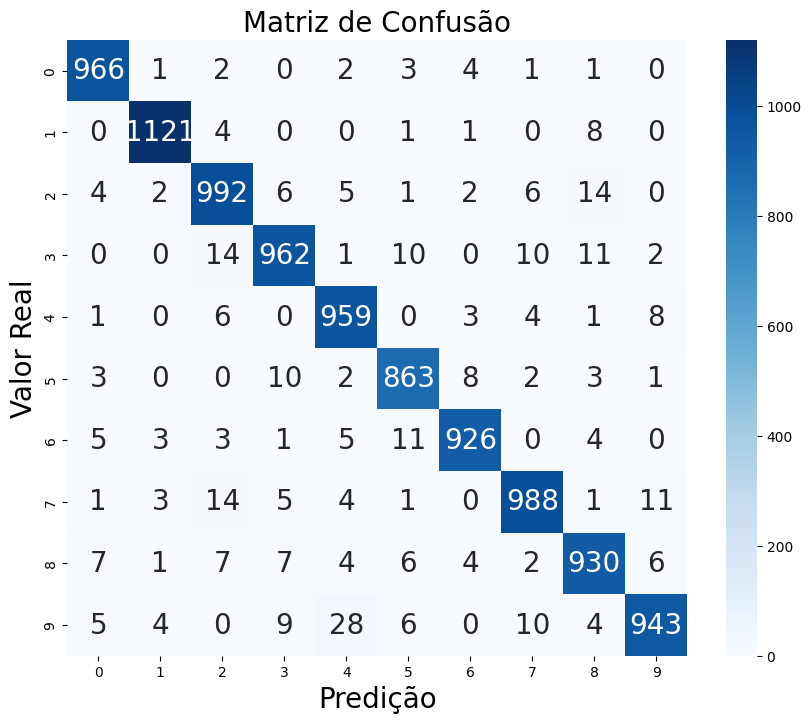

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 20})  # Aumenta o tamanho da fonte das anotações
plt.xlabel('Predição', fontsize=20)
plt.ylabel('Valor Real', fontsize=20)
plt.title('Matriz de Confusão', fontsize=20)
plt.show()

## 3° Estudo

3 camadas:

Flatten(input_shape=(28,28))

Dense(800, activation='sigmoid')

Dense(10, activation='softmax')

optimizer = 'adam'

loss = 'categorical_crossentropy'

In [ ]:
model3 = Sequential()
model3.add(keras.layers.Flatten(input_shape=(28,28)))
model3.add(Dense(800, activation='relu'))
model3.add(Dense(10,activation='softmax'))
model3.compile('adam','categorical_crossentropy', metrics=['categorical_accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


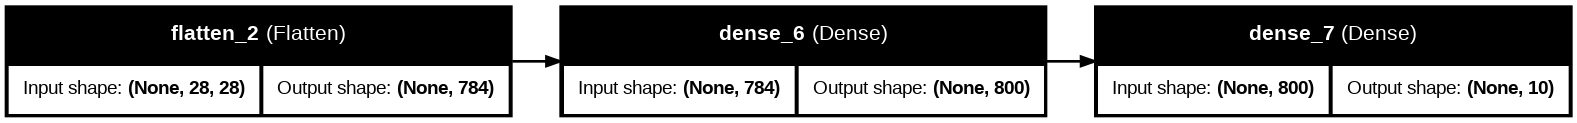

In [ ]:
#model3=create_model3()
from tensorflow.keras.utils import plot_model

plot_model(
    model3,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96
)

In [ ]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model3.fit(X_train, y_train_onehot, validation_split=.1, epochs=500, verbose=2)

Epoch 1/500
1688/1688 - 8s - 5ms/step - categorical_accuracy: 0.9079 - loss: 2.9154 - val_categorical_accuracy: 0.9372 - val_loss: 0.3794
Epoch 2/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9393 - loss: 0.3911 - val_categorical_accuracy: 0.9428 - val_loss: 0.4092
Epoch 3/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9421 - loss: 0.3673 - val_categorical_accuracy: 0.9430 - val_loss: 0.3981
Epoch 4/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9468 - loss: 0.3064 - val_categorical_accuracy: 0.9513 - val_loss: 0.2636
Epoch 5/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9505 - loss: 0.2754 - val_categorical_accuracy: 0.9598 - val_loss: 0.2355
Epoch 6/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9535 - loss: 0.2521 - val_categorical_accuracy: 0.9513 - val_loss: 0.2826
Epoch 7/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9561 - loss: 0.2459 - val_categorical_accuracy: 0.9452 - val_loss: 0.3331
Epoch 8/500
1688/1688 - 2s - 1ms/s

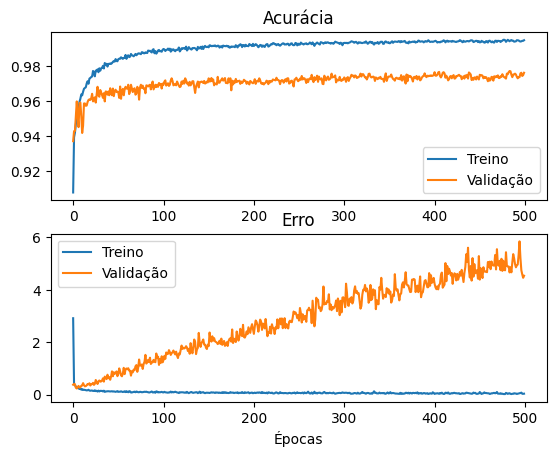

In [ ]:
fig, axes = plt.subplots(2,1)

#  "Accuracy"
axes[0].plot(history.history['categorical_accuracy'])
axes[0].set_title('Acurácia')
# "Loss"
axes[1].plot(history.history['loss'])
axes[1].set_title('Erro')

if 'val_loss' in history.history.keys():
  axes[0].plot(history.history['val_categorical_accuracy'])
  axes[1].plot(history.history['val_loss'])
  axes[0].legend(['Treino', 'Validação'])
  axes[1].legend(['Treino', 'Validação'])

plt.xlabel('Épocas')
plt.show()

In [ ]:
#Calculando classes preditas para os valores de teste

y_pred = model3.predict(X_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Comparando os valores preditos com os reais
y_pred_onehot = y_pred.argmax(axis=1)
print('Classes reais:\t\t', y_test)
print('Classes preditas:\t', y_pred_onehot)

Classes reais:		 [7 2 1 ... 4 5 6]
Classes preditas:	 [7 2 1 ... 4 5 6]


In [ ]:
print(classification_report(y_test, y_pred_onehot))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.94      0.95       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.91      0.96      0.94       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
cm = confusion_matrix(y_test, y_pred_onehot)
print(cm)

[[ 966    0    1    0    0    1    4    1    7    0]
 [   0 1111    3    2    1    2    1    1   14    0]
 [   7    0 1006    4    2    1    0    4    8    0]
 [   0    0    9  983    0    7    0    3    8    0]
 [   1    1    3    0  948    0    4    3    4   18]
 [   5    0    3   16    1  837    5    2   19    4]
 [   4    2    0    0    3    5  936    0    8    0]
 [   2    4    9    4    3    1    0  992    3   10]
 [   1    0    6    3    8    6    4    4  938    4]
 [   1    4    0    7    7    4    2    8   17  959]]


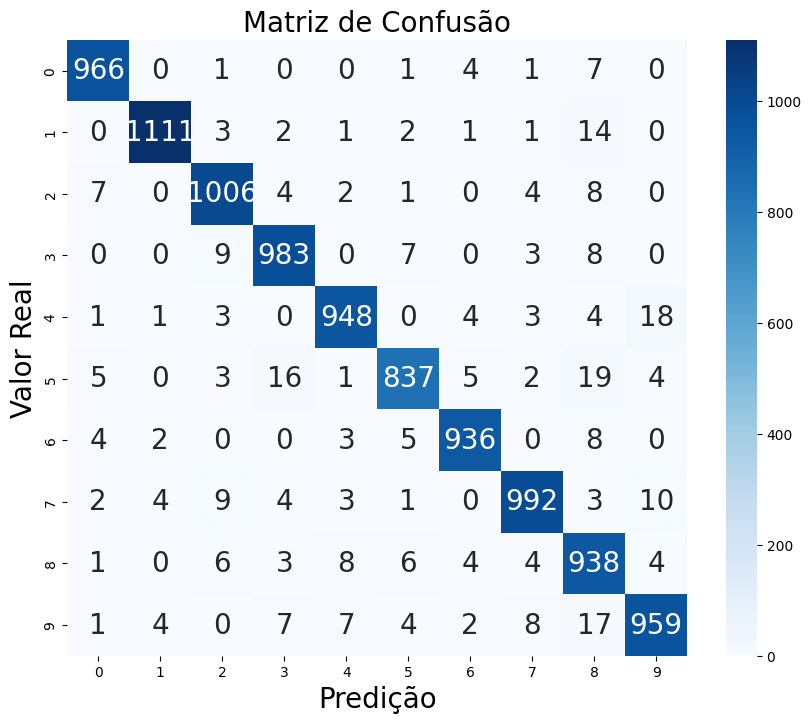

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 20})  # Aumenta o tamanho da fonte das anotações
plt.xlabel('Predição', fontsize=20)
plt.ylabel('Valor Real', fontsize=20)
plt.title('Matriz de Confusão', fontsize=20)
plt.show()

## 4º Estudo

3 camadas:

Flatten(input_shape=(28,28))

Dense(800, activation='relu')

Dense(10, activation='softmax')

optimizer = 'adam'

loss = 'mean_squared_error'

In [ ]:
model4 = Sequential()
model4.add(keras.layers.Flatten(input_shape=(28,28)))
model4.add(Dense(800, activation='relu'))
model4.add(Dense(10,activation='softmax'))
model4.compile('adam','mean_squared_error', metrics=['mean_squared_error'])


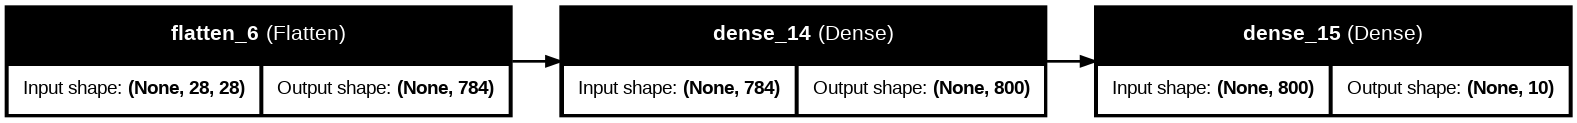

In [ ]:
#model4=create_model4()
from tensorflow.keras.utils import plot_model

plot_model(
    model4,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96
)

In [ ]:
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model4.fit(X_train, y_train_onehot, validation_split=.1, epochs=500, verbose=2)

Epoch 1/500
1688/1688 - 6s - 3ms/step - loss: 0.1628 - mean_squared_error: 0.1628 - val_loss: 0.1727 - val_mean_squared_error: 0.1727
Epoch 2/500
1688/1688 - 2s - 1ms/step - loss: 0.1754 - mean_squared_error: 0.1754 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 3/500
1688/1688 - 2s - 1ms/step - loss: 0.1774 - mean_squared_error: 0.1774 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 4/500
1688/1688 - 2s - 1ms/step - loss: 0.1774 - mean_squared_error: 0.1774 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 5/500
1688/1688 - 2s - 1ms/step - loss: 0.1774 - mean_squared_error: 0.1774 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 6/500
1688/1688 - 2s - 1ms/step - loss: 0.1774 - mean_squared_error: 0.1774 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 7/500
1688/1688 - 2s - 1ms/step - loss: 0.1774 - mean_squared_error: 0.1774 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 8/500
1688/1688 - 2s - 1ms/step - loss: 0.1774 - mean_sq

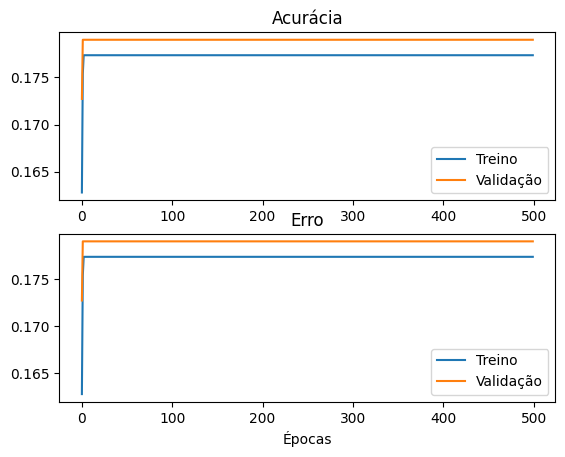

In [ ]:
fig, axes = plt.subplots(2,1)

#  "mean squared error"
axes[0].plot(history.history['mean_squared_error'])
axes[0].set_title('Acurácia')
# "Loss"
axes[1].plot(history.history['loss'])
axes[1].set_title('Erro')

if 'val_loss' in history.history.keys():
  axes[0].plot(history.history['val_mean_squared_error'])
  axes[1].plot(history.history['val_loss'])
  axes[0].legend(['Treino', 'Validação'])
  axes[1].legend(['Treino', 'Validação'])

plt.xlabel('Épocas')
plt.show()

In [ ]:
#Calculando classes preditas para os valores de teste

y_pred = model4.predict(X_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
# Comparando os valores preditos com os reais
y_pred_onehot = y_pred.argmax(axis=1)
print('Classes reais:\t\t', y_test)
print('Classes preditas:\t', y_pred_onehot)

Classes reais:		 [7 2 1 ... 4 5 6]
Classes preditas:	 [1 1 1 ... 1 1 1]


In [ ]:
print(classification_report(y_test, y_pred_onehot))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred_onehot)
print(cm)

[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  981    0    0    0    1    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]


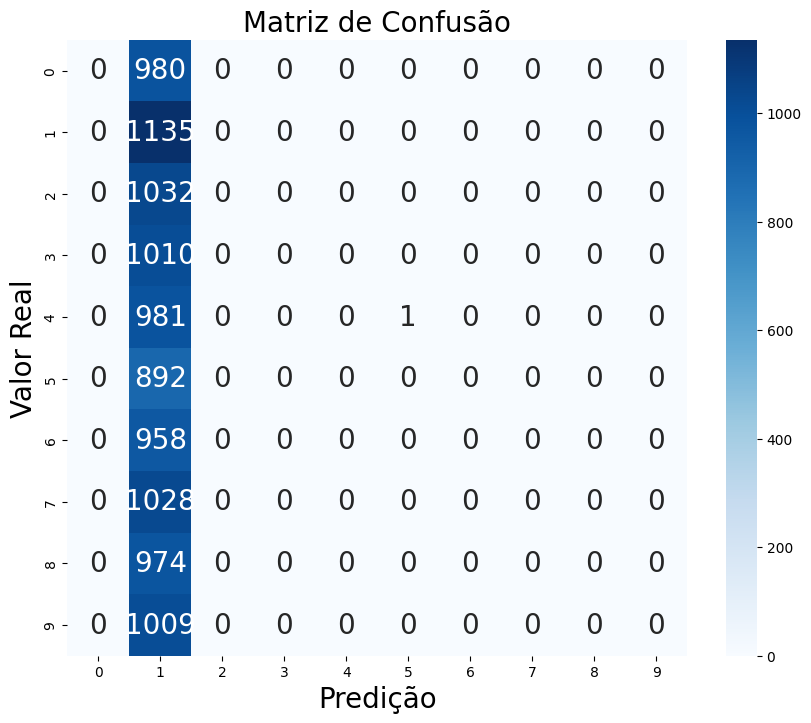

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 20})  # Aumenta o tamanho da fonte das anotações
plt.xlabel('Predição', fontsize=20)
plt.ylabel('Valor Real', fontsize=20)
plt.title('Matriz de Confusão', fontsize=20)
plt.show()

## 5º Estudo

3 camadas:

Flatten(input_shape=(28,28))

Dense(800, activation='relu')

Dense(10, activation='softmax')

optimizer = 'adam'

loss = 'sparse_categorical_crossentropy'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model5 = Sequential()
model5.add(keras.layers.Flatten(input_shape=(28,28)))
model5.add(Dense(800, activation='relu'))
model5.add(Dense(10,activation='softmax'))
model5.compile('adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model5.fit(X_train, y_train, validation_split=.1, epochs=500, verbose=2)

Epoch 1/500
1688/1688 - 6s - 4ms/step - accuracy: 0.9106 - loss: 2.8972 - val_accuracy: 0.9438 - val_loss: 0.3912
Epoch 2/500
1688/1688 - 2s - 1ms/step - accuracy: 0.9401 - loss: 0.3890 - val_accuracy: 0.9455 - val_loss: 0.3091
Epoch 3/500
1688/1688 - 2s - 1ms/step - accuracy: 0.9434 - loss: 0.3297 - val_accuracy: 0.9477 - val_loss: 0.3387
Epoch 4/500
1688/1688 - 2s - 1ms/step - accuracy: 0.9433 - loss: 0.3299 - val_accuracy: 0.9513 - val_loss: 0.2658
Epoch 5/500
1688/1688 - 2s - 1ms/step - accuracy: 0.9510 - loss: 0.2645 - val_accuracy: 0.9525 - val_loss: 0.2910
Epoch 6/500
1688/1688 - 2s - 1ms/step - accuracy: 0.9551 - loss: 0.2488 - val_accuracy: 0.9523 - val_loss: 0.2526
Epoch 7/500
1688/1688 - 2s - 1ms/step - accuracy: 0.9589 - loss: 0.2110 - val_accuracy: 0.9555 - val_loss: 0.3193
Epoch 8/500
1688/1688 - 2s - 1ms/step - accuracy: 0.9587 - loss: 0.2338 - val_accuracy: 0.9582 - val_loss: 0.3336
Epoch 9/500
1688/1688 - 2s - 1ms/step - accuracy: 0.9629 - loss: 0.1930 - val_accuracy: 

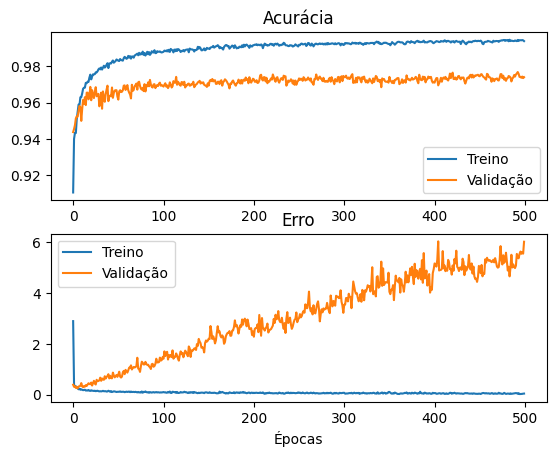

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1)

#  "Accuracy"
axes[0].plot(history.history['accuracy'])
axes[0].set_title('Acurácia')
# "Loss"
axes[1].plot(history.history['loss'])
axes[1].set_title('Erro')

if 'val_loss' in history.history.keys():
  axes[0].plot(history.history['val_accuracy'])
  axes[1].plot(history.history['val_loss'])
  axes[0].legend(['Treino', 'Validação'])
  axes[1].legend(['Treino', 'Validação'])

plt.xlabel('Épocas')
plt.show()

In [ ]:
#Calculando classes preditas para os valores de teste

y_pred = model5.predict(X_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Comparando os valores preditos com os reais
y_pred_onehot = y_pred.argmax(axis=1)
print('Classes reais:\t\t', y_test)
print('Classes preditas:\t', y_pred_onehot)

Classes reais:		 [7 2 1 ... 4 5 6]
Classes preditas:	 [7 2 1 ... 4 5 6]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_onehot))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.92      0.96      0.94       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_onehot)
print(cm)

[[ 966    0    2    0    0    2    5    1    4    0]
 [   1 1125    3    2    0    0    1    0    3    0]
 [   1    2 1005    6    2    1    1    3   11    0]
 [   1    0    2  979    2    6    0    1   16    3]
 [   0    0    4    0  947    0    8    3    4   16]
 [   2    0    0    5    1  868    3    0   11    2]
 [   4    3    0    0    3    7  937    0    4    0]
 [   2    2    9    4    3    1    0  993    6    8]
 [   2    1    2    7   10    5    2    2  939    4]
 [   4    7    0    8    7    6    1    3   22  951]]


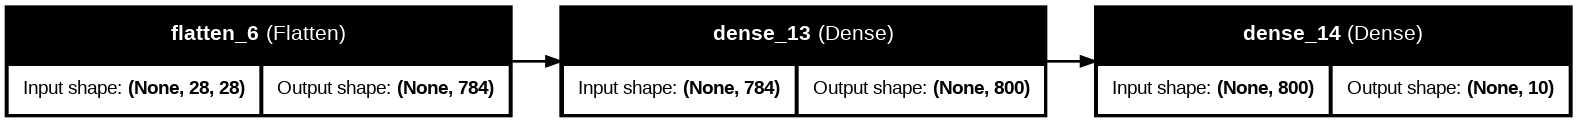

In [ ]:
#model5=create_model5()
from tensorflow.keras.utils import plot_model

plot_model(
    model5,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96
)

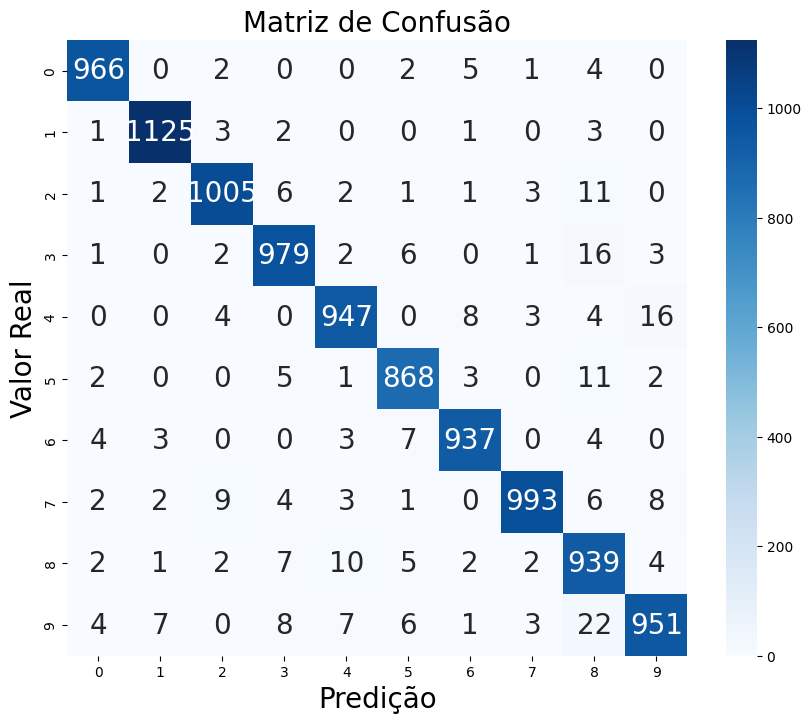

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 20})  # Aumenta o tamanho da fonte das anotações
plt.xlabel('Predição', fontsize=20)
plt.ylabel('Valor Real', fontsize=20)
plt.title('Matriz de Confusão', fontsize=20)
plt.show()

## 6º Estudo

3 camadas:

Flatten(input_shape=(28,28))

Dense(800, activation='relu')

Dense(10, activation='softmax')

optimizer = 'SGD'

loss = 'sparse_categorical_crossentropy'

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model6 = Sequential()
model6.add(keras.layers.Flatten(input_shape=(28,28)))
model6.add(Dense(800, activation='relu'))
model6.add(Dense(10,activation='softmax'))
model6.compile('SGD',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model6.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model6.fit(X_train, y_train, validation_split=.1, epochs=500, verbose=2)

Epoch 1/500
1688/1688 - 4s - 2ms/step - accuracy: 0.5194 - loss: 117.4113 - val_accuracy: 0.4750 - val_loss: 1.4976
Epoch 2/500
1688/1688 - 2s - 1ms/step - accuracy: 0.4849 - loss: 1.6882 - val_accuracy: 0.6407 - val_loss: 1.1926
Epoch 3/500
1688/1688 - 2s - 1ms/step - accuracy: 0.5728 - loss: 1.3468 - val_accuracy: 0.6668 - val_loss: 0.9928
Epoch 4/500
1688/1688 - 2s - 1ms/step - accuracy: 0.4961 - loss: 1.5535 - val_accuracy: 0.3903 - val_loss: 1.5902
Epoch 5/500
1688/1688 - 2s - 1ms/step - accuracy: 0.4234 - loss: 1.6210 - val_accuracy: 0.5367 - val_loss: 1.2618
Epoch 6/500
1688/1688 - 2s - 1ms/step - accuracy: 0.4922 - loss: 1.4938 - val_accuracy: 0.4563 - val_loss: 1.5371
Epoch 7/500
1688/1688 - 2s - 1ms/step - accuracy: 0.4576 - loss: 1.5501 - val_accuracy: 0.5055 - val_loss: 1.4149
Epoch 8/500
1688/1688 - 2s - 1ms/step - accuracy: 0.4703 - loss: 1.5557 - val_accuracy: 0.5687 - val_loss: 1.2400
Epoch 9/500
1688/1688 - 2s - 1ms/step - accuracy: 0.5247 - loss: 1.4419 - val_accuracy

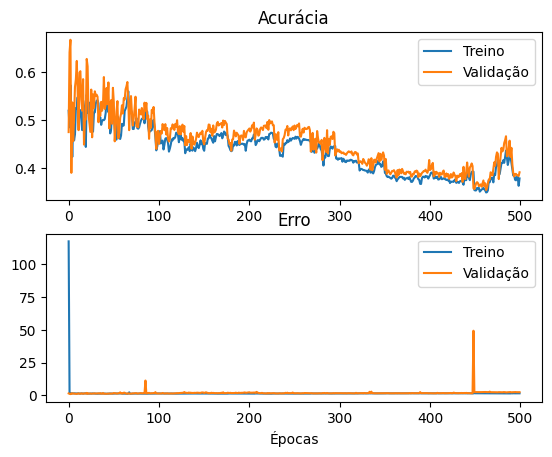

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1)

#  "Accuracy"
axes[0].plot(history.history['accuracy'])
axes[0].set_title('Acurácia')
# "Loss"
axes[1].plot(history.history['loss'])
axes[1].set_title('Erro')

if 'val_loss' in history.history.keys():
  axes[0].plot(history.history['val_accuracy'])
  axes[1].plot(history.history['val_loss'])
  axes[0].legend(['Treino', 'Validação'])
  axes[1].legend(['Treino', 'Validação'])

plt.xlabel('Épocas')
plt.show()

In [11]:
#Calculando classes preditas para os valores de teste

y_pred = model6.predict(X_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.1364535  0.00255005 0.13798493 ... 0.10453617 0.13490546 0.13622163]
 [0.         1.         0.         ... 0.         0.         0.        ]
 ...
 [0.1364535  0.00255005 0.13798493 ... 0.10453617 0.13490546 0.13622163]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.1364535  0.00255005 0.13798493 ... 0.10453617 0.13490546 0.13622163]]


In [12]:
# Comparando os valores preditos com os reais
y_pred_onehot = y_pred.argmax(axis=1)
print('Classes reais:\t\t', y_test)
print('Classes preditas:\t', y_pred_onehot)

Classes reais:		 [7 2 1 ... 4 5 6]
Classes preditas:	 [7 2 1 ... 2 5 2]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_onehot))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       980
           1       0.98      0.98      0.98      1135
           2       0.14      1.00      0.25      1032
           3       0.98      0.09      0.16      1010
           4       0.99      0.55      0.70       982
           5       0.99      0.56      0.71       892
           6       1.00      0.33      0.49       958
           7       1.00      0.25      0.40      1028
           8       0.00      0.00      0.00       974
           9       1.00      0.00      0.00      1009

    accuracy                           0.38     10000
   macro avg       0.81      0.37      0.37     10000
weighted avg       0.81      0.38      0.37     10000



In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_onehot)
print(cm)

[[   1    0  978    0    1    0    0    0    0    0]
 [   0 1110   24    0    0    1    0    0    0    0]
 [   0    4 1027    0    0    0    1    0    0    0]
 [   0    0  921   89    0    0    0    0    0    0]
 [   0    0  446    0  536    0    0    0    0    0]
 [   0    0  395    1    0  496    0    0    0    0]
 [   0    5  635    0    1    2  315    0    0    0]
 [   0    5  766    1    0    0    0  255    1    0]
 [   0    1  970    0    1    2    0    0    0    0]
 [   0    5 1001    0    1    1    0    0    0    1]]


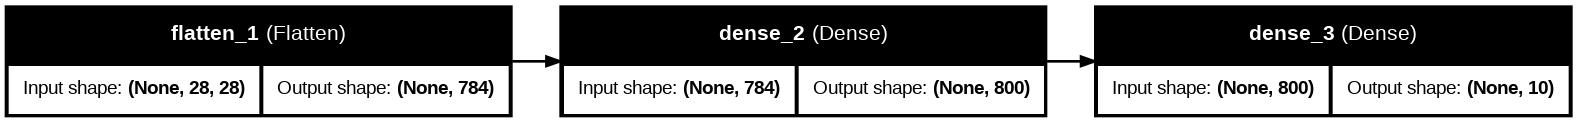

In [15]:
#model5=create_model5()
from tensorflow.keras.utils import plot_model

plot_model(
    model6,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96
)

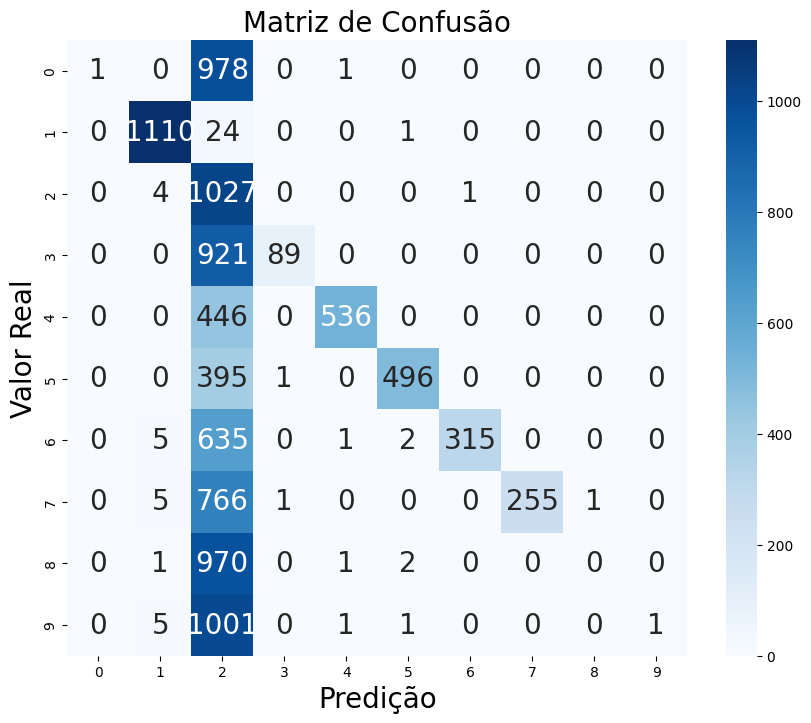

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 20})  # Aumenta o tamanho da fonte das anotações
plt.xlabel('Predição', fontsize=20)
plt.ylabel('Valor Real', fontsize=20)
plt.title('Matriz de Confusão', fontsize=20)
plt.show()